In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma
import cmocean
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
buoyfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc'
wfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_vovecrtz_filt-n80-f0.0125.nc'
mldfile = database + 'MXL/NATL60-CJM165_y2013m03d01.1d_somxl010.nc'
maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'

In [4]:
dep=xr.open_dataset(buoyfile)['deptht']

In [15]:
#box n Box_1  indices =  695 1295 236 993
# minibox1 indices = 695 755 236 296

buoy_minibox1 = xr.open_dataset(buoyfile)['sobuoy'][:,0:79,236:297,695:756]
w_minibox1 = xr.open_dataset(wfile)['vovecrtz'][:,0:79,236:297,695:756]
tmask_minibox1 = xr.open_dataset(maskfile)['tmask'][:,0:79,236:297,695:756]
wmask_minibox1 = xr.open_dataset(maskfile)['fmask'][:,0:79,236:297,695:756]
mld_minibox1 = xr.open_dataset(mldfile)['somxl010'][:,236:297,695:756,]


In [19]:
buoy_minibox1_mask=ma.masked_where(tmask_minibox1 == 0, buoy_minibox1)
w_minibox1_mask=ma.masked_where(wmask_minibox1 == 0, w_minibox1)
avg_wb_minibox1=np.ones(len(dep[0:79]))
for k in np.arange(79):
    avg_wb_minibox1[k] = np.nanmean(buoy_minibox1_mask[0,k,:,:]*w_minibox1_mask[0,k,:,:])

avg_mld_minibox1=np.nanmean(mld_minibox1)

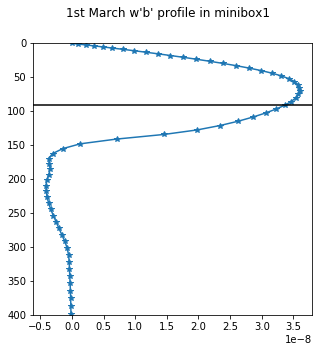

In [26]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.suptitle('1st March w\'b\' profile in minibox1')

axs.plot(avg_wb_minibox1,dep[0:79],'C0*-')
axs.set_ylim(400,0)
#axs.set_xlim(-0.000001,0.000001)
axs.axhline(y=avg_mld_minibox1, color='k')

In [23]:
#box n Box_1  indices =  695 1295 236 993
# minibox1 indices = 695 755 236 296

buoy_box1 = xr.open_dataset(buoyfile)['sobuoy'][:,0:79,236:993,695:1295]
w_box1 = xr.open_dataset(wfile)['vovecrtz'][:,0:79,236:993,695:1295]
tmask_box1 = xr.open_dataset(maskfile)['tmask'][:,0:79,236:993,695:1295]
wmask_box1 = xr.open_dataset(maskfile)['fmask'][:,0:79,236:993,695:1295]
mld_box1 = xr.open_dataset(mldfile)['somxl010'][:,236:993,695:1295]


In [24]:
buoy_box1_mask=ma.masked_where(tmask_box1 == 0, buoy_box1)
w_box1_mask=ma.masked_where(wmask_box1 == 0, w_box1)
avg_wb_box1=np.ones(len(dep[0:79]))
for k in np.arange(79):
    avg_wb_box1[k] = np.nanmean(buoy_box1_mask[0,k,:,:]*w_box1_mask[0,k,:,:])

avg_mld_box1=np.nanmean(mld_box1)

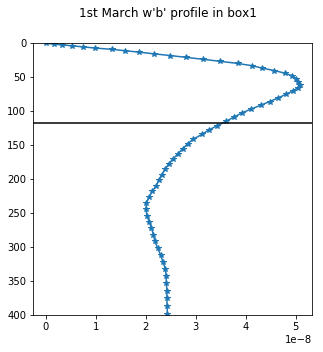

In [27]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
plt.suptitle('1st March w\'b\' profile in box1')

axs.plot(avg_wb_box1,dep[0:79],'C0*-')
axs.set_ylim(400,0)
#axs.set_xlim(-0.000001,0.000001)
axs.axhline(y=avg_mld_box1, color='k')